In [1]:
import mdtraj as md
import numpy as np
import pandas as pd
import sys
from scipy.spatial import ConvexHull

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap

from natsort import natsorted
from pathlib import Path

sys.path.insert(0, '/home/rzhu/Desktop/projects/kinase_analysis/src/')
from funcs_featurise import *
from funcs_db_assign import *
from TrajData import *

plt.rcParams['xtick.labelsize'] = 14  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 14  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 14  # Font size for legend
plt.rcParams['axes.labelsize'] = 18   # Font size for x-label and y-label
plt.rcParams['axes.titlesize'] = 18   # Font size for title

In [2]:
dfg_spatial_colors = np.array([(89, 89, 89),         # Grey undefined
                               (238, 66, 102),       # Pink-red DFG-in
                               (255, 210, 63),       # Yellow DFG-inter
                               (84, 13, 110)])/255   # Purple DFG-out

In [18]:
def plot_fig1b(x, y, c, x_label, y_label, fname):
    fig, ax = plt.subplots(figsize=(6, 8))

    scatter = ax.scatter(x, y, c=c, s=0.3, alpha=0.5)

    legend_patches = [mpatches.Patch(color=dfg_spatial_colors[0], label = "Noise"),
                        mpatches.Patch(color=dfg_spatial_colors[1], label = "DFG-in"),
                        mpatches.Patch(color=dfg_spatial_colors[2], label = "DFG-inter"),
                        mpatches.Patch(color=dfg_spatial_colors[3], label = "DFG-out")]
    ax.legend(handles=legend_patches, loc="upper right")

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xlim(0.2, 2.2)
    ax.set_ylim(0.2, 2.2)
    ax.set_xticks(np.arange(0.2, 2.21, 0.5))
    ax.set_yticks(np.arange(0.2, 2.21, 0.5))
    ax.set_aspect('equal')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.savefig(fname, dpi=300, bbox_inches='tight')
    plt.show()

### Abl1
---

In [4]:
protein = 'abl'
data_path = Path(f'/home/rzhu/Desktop/projects/kinase_analysis/data')
key = 'abl-pdb-50ps'

TD = TrajData(protein = protein)
TD.add_dataset(rtraj_dir = Path(f'/arc/abl_processed/'),
               ftraj_dir= data_path / f'{protein}' / f'{key}' / 'ftrajs',
               dt=0.05,
               key=key)
TD.load_ftrajs(key=key,
               feature_names=['dbdist', 'hdbscan_dist_group'],)

dbdist, _ = TD.get_ftrajs(keys=key, 
                          dt_out=0.05, 
                          internal_names=['dbdist'], 
                          time_cutoff=0,
                          convert_dihed_ids=None)
distgroup, _ = TD.get_ftrajs(keys=key, 
                             dt_out=0.05, 
                             internal_names=['hdbscan_dist_group'], 
                             time_cutoff=0,
                             convert_dihed_ids=None)

dbdist_cat = np.concatenate(dbdist, axis=0)
distgroup_cat = np.concatenate(distgroup, axis=0)

Setting dataset <abl-pdb-50ps>. 
Number of raw trajectories: 749

abl-pdb-50ps
Loading feature:  dbdist


100%|██████████| 749/749 [00:00<00:00, 8095.78it/s]


Loading feature:  hdbscan_dist_group


  0%|          | 0/749 [00:00<?, ?it/s]

100%|██████████| 749/749 [00:00<00:00, 11819.96it/s]


Stride for dataset abl-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 749/749 [00:00<00:00, 18579.28it/s]


Stride for dataset abl-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 749/749 [00:00<00:00, 35180.34it/s]


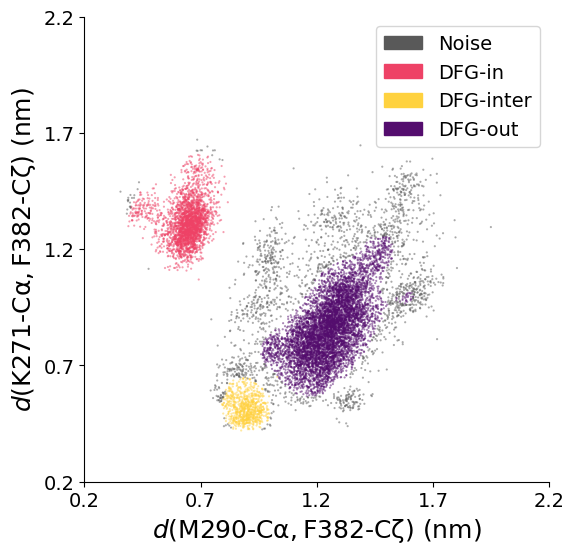

In [19]:
plot_fig1b(x = dbdist_cat[::1000, 0],
           y = dbdist_cat[::1000, 1],
           c = dfg_spatial_colors[distgroup_cat[::1000]+1],
           x_label = r"$d(\mathrm{M290}\text{-C}\mathrm{\alpha}, \mathrm{F382}\text{-C}\mathrm{\zeta})$ (nm)",
           y_label = r"$d(\mathrm{K271}\text{-C}\mathrm{\alpha}, \mathrm{F382}\text{-C}\mathrm{\zeta})$ (nm)",
           fname = 'fig1b_abl.pdf')

### EGFR
---

In [7]:
protein = 'egfr'
data_path = Path(f'/home/rzhu/Desktop/projects/kinase_analysis/data')
key = 'egfr-pdb-50ps'

TD = TrajData(protein = protein)
TD.add_dataset(rtraj_dir = Path(f'/arc/egfr_processed/'),
               ftraj_dir= data_path / f'{protein}' / f'{key}' / 'ftrajs',
               dt=0.05,
               key=key)
TD.load_ftrajs(key=key,
               feature_names=['dbdist', 'hdbscan_dist_group'],)

dbdist, _ = TD.get_ftrajs(keys=key, 
                             dt_out=0.05, 
                             internal_names=['dbdist'], 
                             time_cutoff=0,
                             convert_dihed_ids=None)
distgroup, _ = TD.get_ftrajs(keys=key, 
                             dt_out=0.05, 
                             internal_names=['hdbscan_dist_group'], 
                             time_cutoff=0,
                             convert_dihed_ids=None)

dbdist_cat = np.concatenate(dbdist, axis=0)
distgroup_cat = np.concatenate(distgroup, axis=0)

Setting dataset <egfr-pdb-50ps>. 
Number of raw trajectories: 3472

egfr-pdb-50ps
Loading feature:  dbdist


100%|██████████| 3472/3472 [00:29<00:00, 117.62it/s]


Loading feature:  hdbscan_dist_group


100%|██████████| 3472/3472 [00:16<00:00, 210.31it/s]


Stride for dataset egfr-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 3472/3472 [00:00<00:00, 27356.07it/s]


Stride for dataset egfr-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 3472/3472 [00:00<00:00, 85595.53it/s]


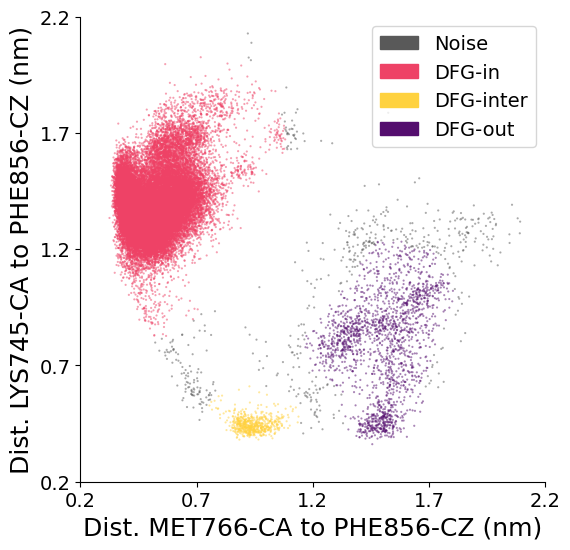

In [8]:
plot_fig1b(x = dbdist_cat[::1000, 0],
           y = dbdist_cat[::1000, 1],
           c = dfg_spatial_colors[distgroup_cat[::1000]+1],
           x_label = 'Dist. MET766-CA to PHE856-CZ (nm)',
           y_label = 'Dist. LYS745-CA to PHE856-CZ (nm)',
           fname = 'fig1b_egfr.svg')